In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
cwd = os.getcwd()
root = 'E:/EEG_wd/Machine_learning/'
Names = os.listdir(root + 'TNT/1_raw')  # Subjects ID
Names = sorted(list(set([subject[:5] for subject in Names])))

# Behavioral results

## Attention

Extract response time

In [3]:
# Extract behavioral results
behavior_df = pd.DataFrame([])
for subject in Names:

    attention_df = pd.read_csv(root + 'Attention/Behavior/' + subject + '.txt')

    for cond in ['Baseline', 'No-Think', 'Think']:

        for block in np.arange(1, 9):

            rt = attention_df['Image.RT'][(attention_df.Cond1 == cond) & 
                                          (attention_df['ListImage.Cycle'] == block)].mean()

            behavior_df = behavior_df.append(pd.DataFrame({'Subject': subject,
                                                           'Block' : block,
                                                           'Condition': cond,
                                                           'TR': rt}, index=[0]), ignore_index=True, sort=True)

behavior_df.TR = behavior_df.TR/1000 # Convert to seconds

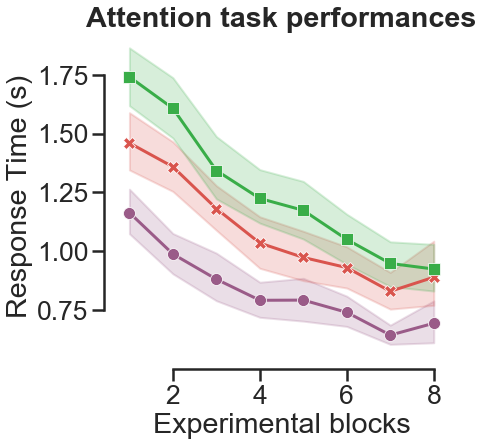

In [4]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context("poster", font_scale=1.2)

sns.lineplot(data=behavior_df,
             x="Block",
             y="TR",
             hue="Condition",
             style="Condition",
             markers=True,
             legend=False,
             dashes=False,
             palette=['#9a5b88',
                      sns.xkcd_rgb["pale red"],
                      sns.xkcd_rgb["medium green"]])
plt.title('Attention task performances', fontweight="bold")
plt.xlabel('Experimental blocks')
plt.ylabel('Response Time (s)')
plt.xticks(np.arange(2, 9, 2))
sns.despine(offset=10, trim=True)
plt.savefig(cwd + '/Figures/Attention_RT.svg', dpi=300, bbox_inches='tight')

Run RM ANOVA

In [34]:
behavior_df.rm_anova(dv='TR',
                     within=['Condition', 'Block'],
                     subject='Subject',
                     detailed=True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Condition,18.787,2,52,9.393,100.623,1.330275e-18,3.215844e-15,0.795,0.793
1,Block,30.316,7,182,4.331,108.354,1.809932e-61,7.940970e-35,0.806,0.548
2,Condition * Block,1.861,14,364,0.133,8.633,3.271846e-16,5.968626e-07,0.249,0.348


Posthoc - Conditions

In [9]:
behavior_df.pairwise_ttests(dv='TR', 
                            within='Condition', 
                            subject='Subject',
                            padjust='bonferroni',
                            effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,tail,p-unc,p-corr,p-adjust,BF10,CLES,cohen
0,Condition,Baseline,No-Think,True,True,-18.597,215.0,two-sided,1.189461e-46,3.568384e-46,bonferroni,1.723e+43,0.717,-0.787
1,Condition,Baseline,Think,True,True,-23.228,215.0,two-sided,1.559688e-60,4.679065e-60,bonferroni,9.928e+56,0.802,-1.208
2,Condition,No-Think,Think,True,True,-9.727,215.0,two-sided,9.172492e-19,2.751747e-18,bonferroni,5.232e+15,0.619,-0.440


Save for validation with JASP

In [ ]:
a = behavior_df.pivot_table(columns = ['Condition', 'Block'], values = 'TR', index = 'Subject')
a = behavior_df.pivot_table(columns = ['Condition'], values = 'TR', index = 'Subject')

a.to_csv('/home/legrand/Bureau/' +  'Attention.txt')

## Think/No-Think

Read recall df

In [11]:
recall = pd.read_csv(cwd + 'Recall.txt')

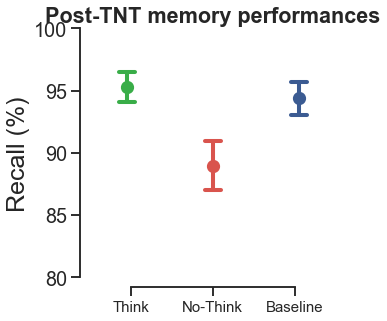

In [12]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context("talk", font_scale=1.2)

sns.catplot(data=recall,
            x="Condition",
            y="recall",
            hue='Condition',
            dodge=0.1,
            ci=68,
            kind='point',
            legend=True,
            legend_out=False,
            palette=[sns.xkcd_rgb["medium green"],
                     sns.xkcd_rgb["pale red"],
                     sns.xkcd_rgb["denim blue"]],
            capsize=0.2)

plt.ylim([80, 100])
sns.despine(offset=10, trim=True)
plt.ylabel('Recall (%)', size=25)
plt.xlabel('')
plt.title('Post-TNT memory performances', fontweight="bold")
plt.xticks(size=15)
plt.savefig(cwd + '/Figures/Recall.svg', dpi=300, bbox_inches='tight')

RM ANOVA

In [13]:
recall.rm_anova(dv='recall',
                within='Condition',
                subject='Subject',
                detailed=True)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Condition,630.771,2,315.385,12.7,3.22633e-05,0.000245475,0.328,0.732,False,0.633,0.00331928
1,Error,1291.302,52,24.833,-,-,-,-,-,-,-,-


Posthoc

In [14]:
recall.pairwise_ttests(dv='recall',
                       within='Condition',
                       subject='Subject',
                       padjust='bonferroni',
                       effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,tail,p-unc,p-corr,p-adjust,BF10,CLES,cohen
0,Condition,Think,No-Think,True,True,4.638,26.0,two-sided,0.000087,0.000262,bonferroni,299.067,0.610,0.769
1,Condition,Think,Baseline,True,True,0.911,26.0,two-sided,0.370646,1.000000,bonferroni,0.297,0.410,0.130
2,Condition,No-Think,Baseline,True,True,-3.255,26.0,two-sided,0.003141,0.009424,bonferroni,12.543,0.588,-0.642


Save for validation with JASP

In [ ]:
a = recall_total.pivot_table(columns=['Condition'],
                             values='recall',
                             index='Subject')
a.to_csv('/home/legrand/Bureau/TNT.txt')

# Mental events

Extract the number of mentals events in intrusive trials outputed by `9_mental_events.py`

In [116]:
events_df = pd.read_csv(root + 'Results/Decoding/mental_events.txt')

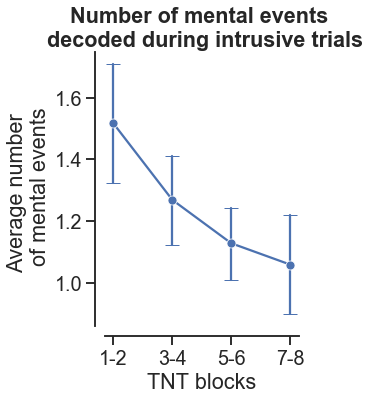

In [117]:
plt.rcParams['figure.figsize'] = [5.0, 6.0]
sns.set_context("talk", font_scale=1.2)
plt.title('Number of mental events \n decoded during intrusive trials', fontweight="bold")
sns.lineplot(data=events_df,
              x='Block',
              y='Events',
              err_style='bars',
              marker="o",
              ci=68,
              err_kws={'capsize':7})
plt.ylabel('Average number \n of mental events')
plt.xlabel('TNT blocks')
sns.despine(offset=10)
plt.tight_layout()
plt.savefig(cwd + '/Figures/mental_events.svg', dpi=300)

In [118]:
events_df.rm_anova(dv='Events',
                   within='Block',
                   subject='Subject',
                   detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Block,2.763,3,0.921,4.932,0.00358801,0.17,0.645
1,Error,13.445,72,0.187,-,-,-,-
